# PRELIMINARIES

In [1]:
import random
import numpy as np
import pandas as pd

#For data exploration
import missingno as msno #A simple library to view completeness of data
import matplotlib.pyplot as plt

from numpy import random
%matplotlib inline

In C:\Users\f.viernes\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\f.viernes\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\f.viernes\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\f.viernes\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\f.viernes\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylel

As we mentioned in the first article in a series dedicated to missing data, the knowledge of the mechanism or structure of "missingness" is crucial because our responses would depend on them.

While the list of techniques is growing for handling missing data, we discuss some of the most basic to the most celebrated techniques below. These techniques include data deletion, constant single, and model-based imputations, and so many more.

Before we begin discussing them, please note that the application of these techniques requires discernment from the data scientist. Even if we can identify the mechanism of missingness, other information such as the data collection and methodology are needed to choose the most appropriate technique.

## ADULT INCOME DATASET

To reinforce our understanding, let's use a dataset, particularly the Adult Income Dataset.

In [2]:
df = pd.read_csv('data/adult.csv')

#Replace the character "?" with 
replace_dict = {
    "?": np.nan}

df.replace(to_replace =replace_dict.keys(), 
                 value =replace_dict.values(), inplace=True)

df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18        NaN  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

<AxesSubplot:>

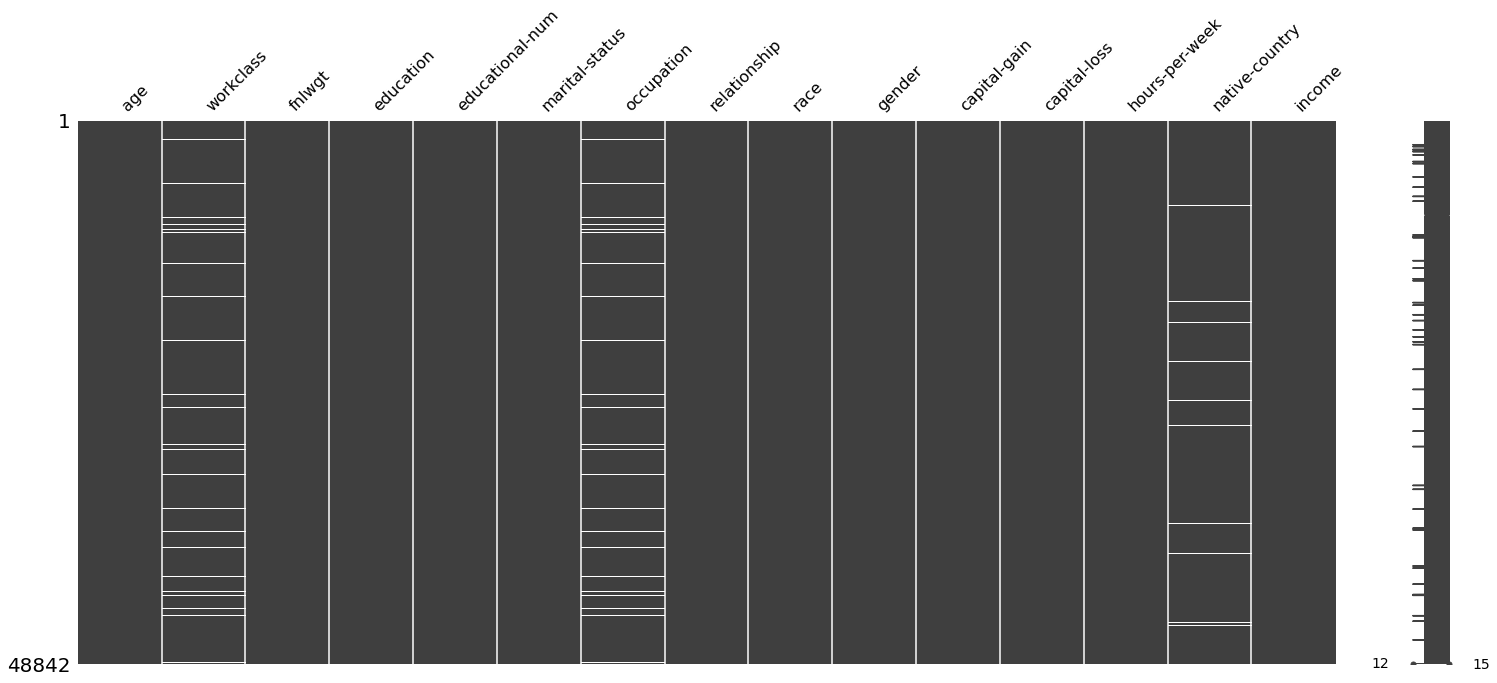

In [3]:
msno.matrix(df)

## SIMULATE MISSIGNESS

Let us simulate some missingness for some of our continuous variables: age and fnlwgt. Note that income here is the target variable and is a categorical variable.

<AxesSubplot:>

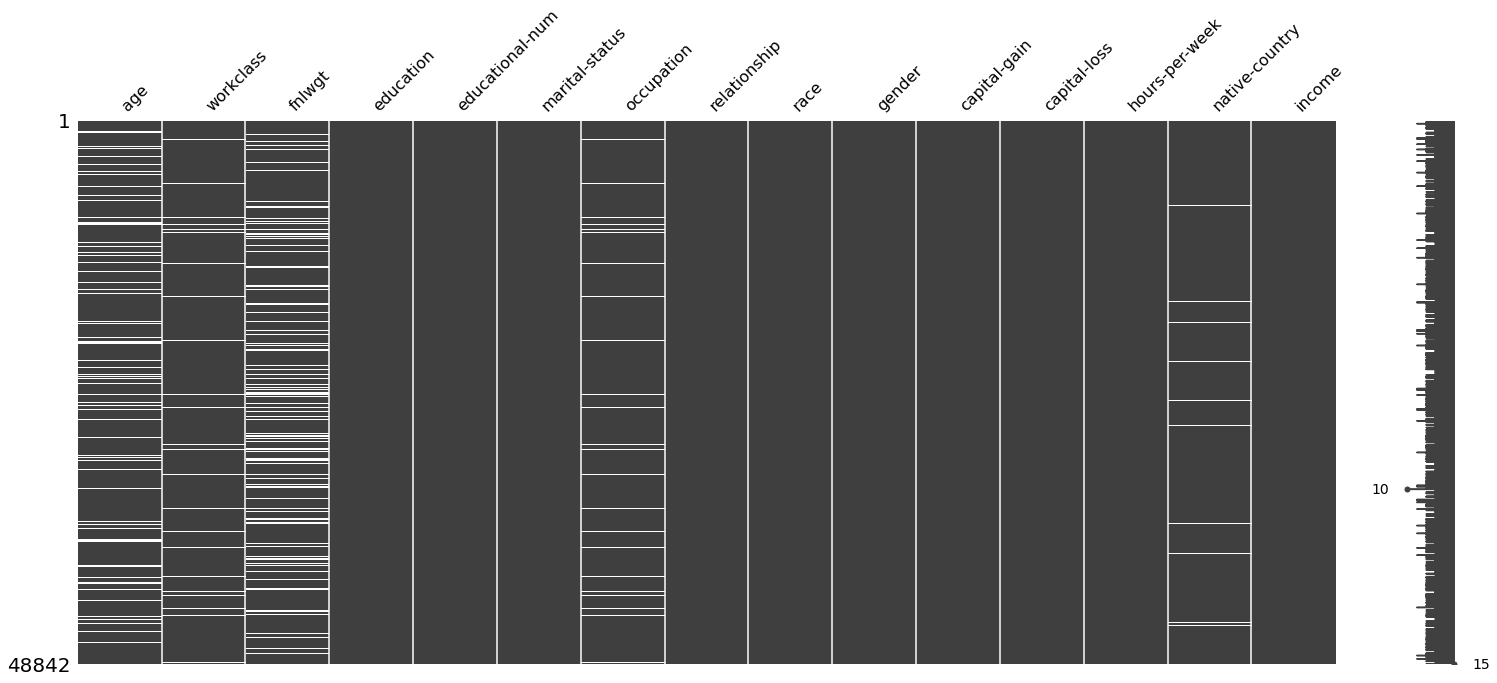

In [4]:
#Save  copy of the original df
orig_df = df.copy()

#Random Seed
random.seed(25)

#Percentage Missing
percentage_missing_1 = 0.15
percentage_missing_2 = 0.10

#Number of Observations
obs = df.shape[0]

#Simulation
df["fnlwgt"] = random.binomial(1,(1-percentage_missing_1), size=obs)*df['fnlwgt']
df["age"] = random.binomial(1,(1-percentage_missing_2), size=obs)*df['age']
df["fnlwgt"] = df["fnlwgt"].replace(0, np.nan)
df["age"]= df["age"].replace(0, np.nan)

msno.matrix(df)




In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              43893 non-null  float64
 1   workclass        46043 non-null  object 
 2   fnlwgt           41409 non-null  float64
 3   education        48842 non-null  object 
 4   educational-num  48842 non-null  int64  
 5   marital-status   48842 non-null  object 
 6   occupation       46033 non-null  object 
 7   relationship     48842 non-null  object 
 8   race             48842 non-null  object 
 9   gender           48842 non-null  object 
 10  capital-gain     48842 non-null  int64  
 11  capital-loss     48842 non-null  int64  
 12  hours-per-week   48842 non-null  int64  
 13  native-country   47985 non-null  object 
 14  income           48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


We have the highest number of missing data for the "final weight" variable. This is consistent with our missing data simulation.

# DATA DELETION METHODS

The simplest data handling method across all data science blogs (and even some published articles) is data deletion. But as we have mentioned in our introduction, data deletion diminishes the effectiveness of our models especially if the amount of missing data is significant.

## LISTWISE METHOD \ COMPLETE CASE METHOD

From the name itself, listwise or complete method drops an observation as long as one value is missing. If this is applied carelessly, review how this reduces our observations:

In [6]:
df1 = df.copy()
df1.dropna(inplace=True)
df1.shape[0]

34454

### BEFORE APPLYING LISTWISE DELETION

Before deciding what to do with missing data, especially if you plan to apply listwise deletion, you need to identify relevant variables first for your study. 

If the variable is not gonna be needed, it does not matter whether the particular item is missing or not and should be excluded in the subset of dataframe before applying listwise deletion.

For example: if we think that the final weight is irrelevant to our study (e.g. predicting income class) we can exclude it from our features dataframe.

In [7]:
df2 = df.copy()
df2 = df2.loc[:, df2.columns != 'fnlwgt']

In [8]:
df2.dropna(inplace=True)
df2.shape[0]

df2.dropna(inplace=True)
df2.shape[0]

40636

## PAIRWISE DELETION \ AVAILABLE CASE METHOD

In contrast with listwise deletion, the available case method uses all available observations. That is, if a feature/variable for an observation is missing, a method or technique that uses this discards only the variable with missing information and not the entire observation.

For example, if an observation above in our dataframe does not contain a value for "final weight", then measures/metrics or parameters that require the final weight value would not be calculated for that observation. Everything else, will still continue to make use of that observation.

This method is so unappreciated, that most do not recognize that this is the method employed in correlation analysis. To see this in action:

In [9]:
df.corr()

age    fnlwgt  educational-num  capital-gain  \
age              1.000000 -0.077254         0.030439      0.078056   
fnlwgt          -0.077254  1.000000        -0.039073     -0.001364   
educational-num  0.030439 -0.039073         1.000000      0.125146   
capital-gain     0.078056 -0.001364         0.125146      1.000000   
capital-loss     0.055760 -0.004975         0.080972     -0.031441   
hours-per-week   0.068930 -0.014363         0.143689      0.082157   

                 capital-loss  hours-per-week  
age                  0.055760        0.068930  
fnlwgt              -0.004975       -0.014363  
educational-num      0.080972        0.143689  
capital-gain        -0.031441        0.082157  
capital-loss         1.000000        0.054467  
hours-per-week       0.054467        1.000000

Notice that we used the original dataframe with missing values and a correlation can still be calculated. In addition to correlation analysis, pairwise method is used for factor analysis.

## AVAILABLE ITEM METHOD

A method used for the creation of composite variables is that of the available item method. This method, like the available case method, uses all available information available.

The available item method aggregates across correlated items by:

1.  First applying a standardization method, for example, z-score.
2.  After that, the transformed variables, instead of being added, are averaged for each observation.

Thus, a composite score can now be created.

Now, this is called a deletion method because it makes no attempt to replace missing values.

If you are planning to create composite scores, one can simply apply this algorithm

# IMPUTATION METHODS

Now that we have a dataset to practice our imputations, let us begin to discuss what these are. 
While we will be discussing the theories and concepts behind, let us employ Scikit-learn to do the dirty work for us.

## CONSTANT REPLACEMENT METHOD

### MEAN SUBSTITUTION

In [10]:
#Import the imputer
from sklearn.impute import SimpleImputer
#Initiate the imputer object
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#Isolate the columns where we want to import
X = df[['age', 'fnlwgt']]

#Fit to learn the mean
imp.fit(X)

#Impute
imputed = imp.transform(X)

In [11]:
df3 = df.copy()
#Let's get the index so we can compare
age_missing = df3[pd.isnull(df3.age)]['age'].index
fnlwgt_missing = df3[pd.isnull(df3['fnlwgt'])]['fnlwgt'].index


In [12]:
#Create a new dataset to compare
mean_imputed = pd.DataFrame(imputed, columns=['age_mean.imp', 'fnlwgt_mean.imp'])
#mean_imputed.loc[age_missing, 'age_mean.imp']

In [13]:
#Include Full Dataset in the Comparison
comparison = pd.concat([orig_df[['age', 'fnlwgt']], X], axis=1)

#Rename so We can Compare Across Datasets
comparison.columns = ["age_orig", "fnlwgt_orig", "age_MCAR", "fnlwgt_MCAR"]

#Concatenate
comparison = pd.concat([comparison, mean_imputed], axis=1)

#View the comparison across dataset
comparison.loc[fnlwgt_missing,["fnlwgt_orig","fnlwgt_MCAR", "fnlwgt_mean.imp"]]

fnlwgt_orig  fnlwgt_MCAR  fnlwgt_mean.imp
0           226802          NaN    189474.231302
23          220931          NaN    189474.231302
31          186651          NaN    189474.231302
44          138371          NaN    189474.231302
45          242832          NaN    189474.231302
...            ...          ...              ...
48804        77266          NaN    189474.231302
48805       191648          NaN    189474.231302
48817       160216          NaN    189474.231302
48828       260761          NaN    189474.231302
48833        84661          NaN    189474.231302

[7433 rows x 3 columns]

In [14]:
comparison[["fnlwgt_orig","fnlwgt_MCAR", "fnlwgt_mean.imp"]].mean()

fnlwgt_orig        189664.134597
fnlwgt_MCAR        189474.231302
fnlwgt_mean.imp    189474.231302
dtype: float64

In [15]:
comparison[["fnlwgt_orig","fnlwgt_MCAR", "fnlwgt_mean.imp"]].var()

fnlwgt_orig        1.115221e+10
fnlwgt_MCAR        1.110750e+10
fnlwgt_mean.imp    9.417072e+09
dtype: float64

Mean imputation preserves the mean of the dataset with missing values, as can be seen in our example above. This, however, is only appropriate if we assume that our data is normally distributed where it is common to assume that most observations are around the mean anyway. It also is substantially helpful, for small missing data cases.

The main disadvantage of mean imputation is the fact that it tends to produce bias estimates for some parameters, particularly the variance of data. This fact affects the construction of confidence intervals which is a serious issue for some researchers.

There is one way to remedy this a bit and this goes for all the constant replacement methods: One can impute different means for different subgroups. For example, for 'age' value imputation, you can choose to impute the mean age for males for all the observations where the age value is missing and the observation belongs to the male group class.

### MAXIMUM LIKELIHOOD MEAN SUBSTITUTION

The maximum likelihood (ML) method is an amazing technique that has the greatest capability of recovering the true population parameters. 

ML methods are highly praised and used because they make use of each and every one observation of the dataset to estimate the population parameters. So if your dataset is MCAR, it has the greatest probability of convergence.

We will be discussing this in detail and the mathematics behind it again in the "model-based" data augmentation technique but for now, let's calculate the ML mean of our dataset.

In [16]:
from scipy import stats
from scipy.optimize import minimize

def age_ML_mean(params):
    mean = params[0]   
    sd = params[1]

    # Calculate negative log likelihood
    nll = -np.sum(stats.norm.logpdf(df.age.dropna(), loc=mean, scale=sd))

    return nll


initParams = [1, 1]

age_results = minimize(age_ML_mean, initParams, method='Nelder-Mead')
mle_age = age_results.x[0]

In [17]:
def fnlwgt_ML_mean(params):
    mean = params[0]   
    sd = params[1]

    # Calculate negative log likelihood
    nll = -np.sum(stats.norm.logpdf(df['fnlwgt'].dropna(), loc=mean, scale=sd))

    return nll


initParams = [7, 12]

fnlwgt_results = minimize(fnlwgt_ML_mean, initParams, method='Nelder-Mead')
mle_fnlwgt = fnlwgt_results.x[0]

In [18]:
fnlwgt_results.x

array([189474.22618208, 105390.83346926])

For smaller datasets, as long as we got the correct distributional assumptions, then the ML estimate for mean may actually be better than what we get for ordinary mean estimation.

After getting the estimate, you can therefore substitute it as a constant to the imputer.
A particular disadvantage for the use of Maximum-Likelihood methods is that we need to assume the distribution of the data. Prior knowledge of the distribution or some preliminary EDA may help a bit in this regard. In addition, a separate MLE calculation is done per feature unlike the mean and median constant replacements.

In [19]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=mle_age)

#Fit
imp.fit(X['age'].values.reshape(-1, 1))

mle_imputed = pd.DataFrame(imp.transform(X['age'].values.reshape(-1, 1)), columns=['age_mle.imp'])
comparison = pd.concat([comparison, mle_imputed], axis=1)

#View the comparison across dataset
comparison.loc[age_missing,["age_orig","age_MCAR", "age_mean.imp", 'age_mle.imp']]

age_orig  age_MCAR  age_mean.imp  age_mle.imp
10           65       NaN     38.618071    38.618026
43           29       NaN     38.618071    38.618026
49           56       NaN     38.618071    38.618026
57           34       NaN     38.618071    38.618026
79           20       NaN     38.618071    38.618026
...         ...       ...           ...          ...
48733        32       NaN     38.618071    38.618026
48756        22       NaN     38.618071    38.618026
48764        27       NaN     38.618071    38.618026
48786        33       NaN     38.618071    38.618026
48832        32       NaN     38.618071    38.618026

[4949 rows x 4 columns]

In [20]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=mle_fnlwgt)

#Fit
imp.fit(X['fnlwgt'].values.reshape(-1, 1))

mle_imputed = pd.DataFrame(imp.transform(X['fnlwgt'].values.reshape(-1, 1)), columns=['fnlwgt_mle.imp'])
comparison = pd.concat([comparison, mle_imputed], axis=1)
#View the comparison across dataset
comparison.loc[fnlwgt_missing,["fnlwgt_orig","fnlwgt_MCAR", "fnlwgt_mean.imp", 'fnlwgt_mle.imp']]

fnlwgt_orig  fnlwgt_MCAR  fnlwgt_mean.imp  fnlwgt_mle.imp
0           226802          NaN    189474.231302   189474.226182
23          220931          NaN    189474.231302   189474.226182
31          186651          NaN    189474.231302   189474.226182
44          138371          NaN    189474.231302   189474.226182
45          242832          NaN    189474.231302   189474.226182
...            ...          ...              ...             ...
48804        77266          NaN    189474.231302   189474.226182
48805       191648          NaN    189474.231302   189474.226182
48817       160216          NaN    189474.231302   189474.226182
48828       260761          NaN    189474.231302   189474.226182
48833        84661          NaN    189474.231302   189474.226182

[7433 rows x 4 columns]

In [21]:
#Mean Comparisons
comparison[["fnlwgt_orig","fnlwgt_MCAR", "fnlwgt_mean.imp", 'fnlwgt_mle.imp']].mean()

fnlwgt_orig        189664.134597
fnlwgt_MCAR        189474.231302
fnlwgt_mean.imp    189474.231302
fnlwgt_mle.imp     189474.230523
dtype: float64

In [22]:
np.sqrt(comparison[["fnlwgt_orig","fnlwgt_MCAR", "fnlwgt_mean.imp", 'fnlwgt_mle.imp']].var())

fnlwgt_orig        105604.025423
fnlwgt_MCAR        105392.105559
fnlwgt_mean.imp     97041.596928
fnlwgt_mle.imp      97041.596928
dtype: float64

### MEDIAN SUBSTITUTION

In [23]:
#Median Imputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(X)

SimpleImputer(strategy='median')

In [24]:
median_imputed = pd.DataFrame(imp.transform(X), columns=['age_median.imp', 'fnlwgt_median.imp'])
comparison = pd.concat([comparison, median_imputed], axis=1)

#View the comparison across dataset
comparison.loc[fnlwgt_missing,["fnlwgt_orig","fnlwgt_MCAR", "fnlwgt_mean.imp", 'fnlwgt_mle.imp',"fnlwgt_median.imp" ]]

fnlwgt_orig  fnlwgt_MCAR  fnlwgt_mean.imp  fnlwgt_mle.imp  \
0           226802          NaN    189474.231302   189474.226182   
23          220931          NaN    189474.231302   189474.226182   
31          186651          NaN    189474.231302   189474.226182   
44          138371          NaN    189474.231302   189474.226182   
45          242832          NaN    189474.231302   189474.226182   
...            ...          ...              ...             ...   
48804        77266          NaN    189474.231302   189474.226182   
48805       191648          NaN    189474.231302   189474.226182   
48817       160216          NaN    189474.231302   189474.226182   
48828       260761          NaN    189474.231302   189474.226182   
48833        84661          NaN    189474.231302   189474.226182   

       fnlwgt_median.imp  
0               177907.0  
23              177907.0  
31              177907.0  
44              177907.0  
45              177907.0  
...                  ...  
48804           177907.0  
48805           177907.0  
48817           177907.0  
48828           177907.0  
48833           177907.0  

[7433 rows x 5 columns]

### ZERO IMPUTATIONS

For some types of studies, it is more natural to impute zero ('0') for missing variables. Zero may make sense particularly for variables that are social in nature such as "withdrawal of interest"  or for people who failed to show up during exams where naturally they virtually got a score of 0 anyway.

Of course, it is only possible for variables where 0 is a valid value, so this is not possible for the age variable where participants are not really newborns.

## RANDOM REPLACEMENT VALUES

As opposed to constant value replacement methods, random replacement methods replace missing data with randomly generated values. 

There are two general ways of accomplishing this:

1.  Using empirical data - If you are familiar with bootstrap methods, then you can view this as similar to that. This means that data that is used to replace missing values comes from the available data within the dataset itself.
2.  Using statistical distributions - Since we may have knowledge of the particular distribution of a variable, we can draw samples from the theoretical/statistical distributions. For this, we can substitute our ML estimates for the parameters as ML estimates are considered robust.

Let's try to discuss some of the empirical random replacement methods.

### HOT-DECK METHOD

Hot-deck methods refer to methods that replace the missing values with a randomly selected value from the current dataset on hand. This is contrasted to cold-deck methods where you may have a separate dataset to randomly draw values from.

For example, for our adult dataset, if a person has forgotten to report his/her age, this method would pick a random value from those that have reported their age.

In [25]:
random.seed(25)
df4 = df.copy()

#For Age
df4.loc[:,'age'] = [random.choice(df4['age'].dropna()) if np.isnan(i) else i for i in df4['age']]

#For Weight
df4.loc[:,'fnlwgt'] = [random.choice(df4['fnlwgt'].dropna()) if np.isnan(i) else i for i in df4['fnlwgt']]

df4.loc[fnlwgt_missing,'fnlwgt']


0        101709.0
23       169905.0
31       360689.0
44       140456.0
45       107991.0
           ...   
48804    195516.0
48805    109097.0
48817     89564.0
48828    375313.0
48833    104329.0
Name: fnlwgt, Length: 7433, dtype: float64

In [26]:
cols = comparison.columns.to_list()

comparison = pd.concat([comparison, df4[['age', 'fnlwgt']]], axis=1)

comparison.columns =  [*cols,'age_hdeck.imp', 'fnlwgt_hdeck.imp']
#View the comparison across dataset
comparison.loc[fnlwgt_missing,["fnlwgt_orig","fnlwgt_MCAR", "fnlwgt_mean.imp", 'fnlwgt_mle.imp',"fnlwgt_median.imp",'fnlwgt_hdeck.imp' ]]

fnlwgt_orig  fnlwgt_MCAR  fnlwgt_mean.imp  fnlwgt_mle.imp  \
0           226802          NaN    189474.231302   189474.226182   
23          220931          NaN    189474.231302   189474.226182   
31          186651          NaN    189474.231302   189474.226182   
44          138371          NaN    189474.231302   189474.226182   
45          242832          NaN    189474.231302   189474.226182   
...            ...          ...              ...             ...   
48804        77266          NaN    189474.231302   189474.226182   
48805       191648          NaN    189474.231302   189474.226182   
48817       160216          NaN    189474.231302   189474.226182   
48828       260761          NaN    189474.231302   189474.226182   
48833        84661          NaN    189474.231302   189474.226182   

       fnlwgt_median.imp  fnlwgt_hdeck.imp  
0               177907.0          101709.0  
23              177907.0          169905.0  
31              177907.0          360689.0  
44              177907.0          140456.0  
45              177907.0          107991.0  
...                  ...               ...  
48804           177907.0          195516.0  
48805           177907.0          109097.0  
48817           177907.0           89564.0  
48828           177907.0          375313.0  
48833           177907.0          104329.0  

[7433 rows x 6 columns]

In [27]:
#Mean Comparisons
comparison[["fnlwgt_orig","fnlwgt_MCAR", "fnlwgt_mean.imp", 'fnlwgt_mle.imp', 'fnlwgt_hdeck.imp']].mean()

fnlwgt_orig         189664.134597
fnlwgt_MCAR         189474.231302
fnlwgt_mean.imp     189474.231302
fnlwgt_mle.imp      189474.230523
fnlwgt_hdeck.imp    189761.082552
dtype: float64

In [28]:
#Standard Deviation
np.sqrt(comparison[["fnlwgt_orig","fnlwgt_MCAR", "fnlwgt_mean.imp", 'fnlwgt_mle.imp', 'fnlwgt_hdeck.imp']].var())

fnlwgt_orig         105604.025423
fnlwgt_MCAR         105392.105559
fnlwgt_mean.imp      97041.596928
fnlwgt_mle.imp       97041.596928
fnlwgt_hdeck.imp    105647.817389
dtype: float64

### COLD DECK METHODS

It may be possible to draw in a replacement value from a separate dataset that is similar to the one with missing values.

For example, you may want to study about two groups of people where the population is homogenous but you simply happened to divide these into two groups(e.g. a Monday group and Tuesday group). If you have missing values for the Tuesday group, say for age, under the premise that both groups are homogenous and randomly assigned, then its possible to fill-in the missing for age using a randomly chosen value for age coming from the Monday group.

A cold deck can be implemented using two subgroups of training dataset, as well, as what we do with validation. Be careful not to use data from your test dataset to avoid data leakage.

### NON-RANDOM REPLACEMENT: ONE CONDITIONS

In [29]:
df5 = df.copy()

#Accomplish Using Transform Method
df5["age"] = df5['age'].fillna(df.groupby('workclass')['age'].transform('mean'))
df5["fnlwgt"] = df5['fnlwgt'].fillna(df.groupby('workclass')['fnlwgt'].transform('mean'))

In [30]:
cols = comparison.columns.to_list()

comparison = pd.concat([comparison, df5[['age', 'fnlwgt']]], axis=1)

comparison.columns =  [*cols,'age_grpmean.imp', 'fnlwgt_grpmean.imp']
#View the comparison across dataset
comparison.loc[fnlwgt_missing,["fnlwgt_orig","fnlwgt_MCAR", 
                               "fnlwgt_mean.imp", 'fnlwgt_mle.imp',
                               "fnlwgt_median.imp",'fnlwgt_hdeck.imp',
                              'fnlwgt_grpmean.imp']]

fnlwgt_orig  fnlwgt_MCAR  fnlwgt_mean.imp  fnlwgt_mle.imp  \
0           226802          NaN    189474.231302   189474.226182   
23          220931          NaN    189474.231302   189474.226182   
31          186651          NaN    189474.231302   189474.226182   
44          138371          NaN    189474.231302   189474.226182   
45          242832          NaN    189474.231302   189474.226182   
...            ...          ...              ...             ...   
48804        77266          NaN    189474.231302   189474.226182   
48805       191648          NaN    189474.231302   189474.226182   
48817       160216          NaN    189474.231302   189474.226182   
48828       260761          NaN    189474.231302   189474.226182   
48833        84661          NaN    189474.231302   189474.226182   

       fnlwgt_median.imp  fnlwgt_hdeck.imp  fnlwgt_grpmean.imp  
0               177907.0          101709.0       192481.177488  
23              177907.0          169905.0       192481.177488  
31              177907.0          360689.0       175027.095516  
44              177907.0          140456.0       179941.352906  
45              177907.0          107991.0       192481.177488  
...                  ...               ...                 ...  
48804           177907.0          195516.0       192481.177488  
48805           177907.0          109097.0       192481.177488  
48817           177907.0           89564.0       192481.177488  
48828           177907.0          375313.0       192481.177488  
48833           177907.0          104329.0       192481.177488  

[7433 rows x 7 columns]

In [31]:
#Mean Comparisons
comparison[["fnlwgt_orig","fnlwgt_MCAR", "fnlwgt_mean.imp", 'fnlwgt_mle.imp', 'fnlwgt_grpmean.imp' ]].mean()

fnlwgt_orig           189664.134597
fnlwgt_MCAR           189474.231302
fnlwgt_mean.imp       189474.231302
fnlwgt_mle.imp        189474.230523
fnlwgt_grpmean.imp    189482.381617
dtype: float64

In [32]:
#Standard Deviation
np.sqrt(comparison[["fnlwgt_orig","fnlwgt_MCAR", "fnlwgt_mean.imp", 'fnlwgt_mle.imp', 'fnlwgt_hdeck.imp','fnlwgt_grpmean.imp' ]].var())

fnlwgt_orig           105604.025423
fnlwgt_MCAR           105392.105559
fnlwgt_mean.imp        97041.596928
fnlwgt_mle.imp         97041.596928
fnlwgt_hdeck.imp      105647.817389
fnlwgt_grpmean.imp     97459.655505
dtype: float64

### LAST OBSERVATION CARRIED FORWARD (LOCV)

For some time-series data, a primary reason for missing data is that of 'attrition'. For example, suppose you are studying the effect of weight-loss programs for a specific person. If you see continuous improvement until the last observation, then the first missing observation can be assumed to be around the same value as the last one. Attrition here happened because that person has achieved his/her ideal weight.

If you apply this method to a non-time series dataset, then this is considered a "hot deck" method as it uses actual observations from your dataset. Caution, however, should be exercised as this may not be entirely appropriate for a lot of cases as it has been proven to bias parameter estimates and increase Type 1 errors.

In [33]:
#df['variable'].fillna(method='ffill')

#Another implementation
#df['age'] = df.groupby(['workclass'])['age'].ffill()

### NEXT OBSERVATION CARRIED BACKWARD (NOCB)

Similar in spirt to LOCF, "Next Observation Carried Forward (NOCB)" carries subsequent values but instead of forward, it does so backwards. If you have ever heard of the term "backfill", this is essentially that process.

If you think about it, there are a lot of cases where this is employed. Say for example that you are salary progression of different test subjects. If you know for a fact that companies did not give a raise for a particular year (for example, during the COVID-pandemic), then you can backfill past years with current year's salary.

In [34]:
#df['variable'].fillna(method='backfill')

#Another implementation but combined with groupmeans method
#df['age'] = df.groupby(['workclass'])['age'].ffill()

In [35]:
df6 = df.copy()

df6[['age', 'fnlwgt']]= df6[['age', 'fnlwgt']] = df6[['age', 'fnlwgt']].fillna(df6[['age', 'fnlwgt']].rolling(3,min_periods=0).mean())

In [36]:
df6.loc[age_missing,['age', 'fnlwgt']]

age    fnlwgt
10     39.5  184454.0
43     40.0  103634.0
49     53.0  131916.0
57     42.0  382078.0
79     59.5   72055.0
...     ...       ...
48733  38.0  236318.0
48756  38.5   67234.0
48764  42.0  155382.0
48786  48.5  182401.0
48832  43.0   34066.0

[4949 rows x 2 columns]

In [37]:
df7 = df.copy()
df7[['age', 'fnlwgt']] = df7[['age', 'fnlwgt']].iloc[::-1].rolling(3, min_periods=0).mean().iloc[::-1]
df7.loc[age_missing,['age', 'fnlwgt']]

age         fnlwgt
10     31.0  159670.000000
43     24.0  103634.000000
49     28.5  155523.666667
57     37.5  274168.000000
79     34.0   69528.000000
...     ...            ...
48733  48.0  247125.500000
48756  42.0   70851.666667
48764  38.0  179150.666667
48786  44.0  242386.500000
48832  37.5   75102.000000

[4949 rows x 2 columns]

### REGRESSION AND REGRESSION WITH ERROR

Regression and Regression with error methods fill in the missing values for variables, by predicting it based on the other variables in the dataset.

In a way, you can think of it as the missing value being the target variable in a linear regression model. Come to think of it, when you employ any supervised learning model, you are trying to predict or find an unobserved outcome. And missing data, are by themselves, unobserved outcomes.

The predicted value can use all the other variables in the dataset or simply just a subset of it.
We can craft a code that will do this from scratch but let us simply use an available package: autoimpute. After running pip install autoimpute on your terminal, we can run the following code:

In [38]:
from autoimpute.imputations import SingleImputer, MultipleImputer

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [39]:
df8 = df.copy()

# create an instance of the single imputer and impute the data
# with autoimpute, you can choose a strategy per category or variable 
si_dict = SingleImputer(strategy={"age":'least squares', "fnlwgt": 'least squares'})
si_data_full = si_dict.fit_transform(df8[['age', 'fnlwgt']])

In [40]:
si_data_full

age         fnlwgt
0      25.0  197464.746914
1      38.0   89814.000000
2      28.0  336951.000000
3      44.0  160323.000000
4      18.0  103497.000000
...     ...            ...
48837  27.0  257302.000000
48838  40.0  154374.000000
48839  58.0  151910.000000
48840  22.0  201490.000000
48841  52.0  287927.000000

[48842 rows x 2 columns]

In some cases, adding error to the regression prediction allows greater stochasticity which may improve the parameter estimation of the model, especially the variance. Unfortunately, this can't be accomplished through autoimpute but we can do so if the regression model is made from scratch.

One potential disadvantage of using the same variables for imputations with those that are included in the machine learning model that you are going to create is that it may introduce some bias to the parameter estimations. This means that preferably, use a set of variables that are not included in the machine learning model that you are currently studying, to carry out the regression imputation.

In [41]:
cols = comparison.columns.to_list()
comparison = pd.concat([comparison, si_data_full], axis=1)
comparison.columns =  [*cols,'age_regression.imp', 'fnlwgt_regression.imp']
#View the comparison across dataset
comparison.loc[fnlwgt_missing,["fnlwgt_orig","fnlwgt_MCAR", 
                               "fnlwgt_mean.imp", 'fnlwgt_mle.imp',
                               "fnlwgt_median.imp",'fnlwgt_hdeck.imp',
                              'fnlwgt_grpmean.imp', 'fnlwgt_regression.imp']]

fnlwgt_orig  fnlwgt_MCAR  fnlwgt_mean.imp  fnlwgt_mle.imp  \
0           226802          NaN    189474.231302   189474.226182   
23          220931          NaN    189474.231302   189474.226182   
31          186651          NaN    189474.231302   189474.226182   
44          138371          NaN    189474.231302   189474.226182   
45          242832          NaN    189474.231302   189474.226182   
...            ...          ...              ...             ...   
48804        77266          NaN    189474.231302   189474.226182   
48805       191648          NaN    189474.231302   189474.226182   
48817       160216          NaN    189474.231302   189474.226182   
48828       260761          NaN    189474.231302   189474.226182   
48833        84661          NaN    189474.231302   189474.226182   

       fnlwgt_median.imp  fnlwgt_hdeck.imp  fnlwgt_grpmean.imp  \
0               177907.0          101709.0       192481.177488   
23              177907.0          169905.0       192481.177488   
31              177907.0          360689.0       175027.095516   
44              177907.0          140456.0       179941.352906   
45              177907.0          107991.0       192481.177488   
...                  ...               ...                 ...   
48804           177907.0          195516.0       192481.177488   
48805           177907.0          109097.0       192481.177488   
48817           177907.0           89564.0       192481.177488   
48828           177907.0          375313.0       192481.177488   
48833           177907.0          104329.0       192481.177488   

       fnlwgt_regression.imp  
0              197464.746914  
23             197464.746914  
31             179107.394195  
44             200425.610256  
45             195688.228909  
...                      ...  
48804          194503.883573  
48805          196872.574246  
48817          192135.192899  
48828          186805.638884  
48833          186805.638884  

[7433 rows x 8 columns]

In [42]:
#Mean Comparisons
comparison[["fnlwgt_orig","fnlwgt_MCAR", "fnlwgt_mean.imp", 'fnlwgt_mle.imp', 'fnlwgt_grpmean.imp','fnlwgt_regression.imp' ]].mean()

fnlwgt_orig              189664.134597
fnlwgt_MCAR              189474.231302
fnlwgt_mean.imp          189474.231302
fnlwgt_mle.imp           189474.230523
fnlwgt_grpmean.imp       189482.381617
fnlwgt_regression.imp    189477.143245
dtype: float64

In [43]:
#Standard Deviation
np.sqrt(comparison[["fnlwgt_orig","fnlwgt_MCAR", "fnlwgt_mean.imp", 'fnlwgt_mle.imp', 'fnlwgt_hdeck.imp','fnlwgt_grpmean.imp','fnlwgt_regression.imp' ]].var())

fnlwgt_orig              105604.025423
fnlwgt_MCAR              105392.105559
fnlwgt_mean.imp           97041.596928
fnlwgt_mle.imp            97041.596928
fnlwgt_hdeck.imp         105647.817389
fnlwgt_grpmean.imp        97459.655505
fnlwgt_regression.imp     97087.408498
dtype: float64

### K-NEAREST NEIGHBORS (KNN)

Similar to the regression and regression with error model that we have just discussed, KNN can be used to fill in missing values in a dataset.

The intuition behind this is that a point value can be approximated by the points nearest to that missing point.
We can use the KNNImputer from scikit-learn to accomplish this:

In [44]:
df9 = df.copy()

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer

# calling the KNN class
knn_imputer = KNNImputer(n_neighbors=3)
# imputing the missing value with knn imputer
df9[['age', 'fnlwgt']] = knn_imputer.fit_transform(df9[['age', 'fnlwgt']])


In [45]:
cols = comparison.columns.to_list()
comparison = pd.concat([comparison, df9[['age', 'fnlwgt']]], axis=1)
comparison.columns =  [*cols,'age_KNN.imp', 'fnlwgt_KNN.imp']
#View the comparison across dataset
comparison.loc[fnlwgt_missing,["fnlwgt_orig","fnlwgt_MCAR", 
                               "fnlwgt_mean.imp", 'fnlwgt_mle.imp',
                               "fnlwgt_median.imp",'fnlwgt_hdeck.imp',
                              'fnlwgt_grpmean.imp', 'fnlwgt_regression.imp',
                              'fnlwgt_KNN.imp']]

fnlwgt_orig  fnlwgt_MCAR  fnlwgt_mean.imp  fnlwgt_mle.imp  \
0           226802          NaN    189474.231302   189474.226182   
23          220931          NaN    189474.231302   189474.226182   
31          186651          NaN    189474.231302   189474.226182   
44          138371          NaN    189474.231302   189474.226182   
45          242832          NaN    189474.231302   189474.226182   
...            ...          ...              ...             ...   
48804        77266          NaN    189474.231302   189474.226182   
48805       191648          NaN    189474.231302   189474.226182   
48817       160216          NaN    189474.231302   189474.226182   
48828       260761          NaN    189474.231302   189474.226182   
48833        84661          NaN    189474.231302   189474.226182   

       fnlwgt_median.imp  fnlwgt_hdeck.imp  fnlwgt_grpmean.imp  \
0               177907.0          101709.0       192481.177488   
23              177907.0          169905.0       192481.177488   
31              177907.0          360689.0       175027.095516   
44              177907.0          140456.0       179941.352906   
45              177907.0          107991.0       192481.177488   
...                  ...               ...                 ...   
48804           177907.0          195516.0       192481.177488   
48805           177907.0          109097.0       192481.177488   
48817           177907.0           89564.0       192481.177488   
48828           177907.0          375313.0       192481.177488   
48833           177907.0          104329.0       192481.177488   

       fnlwgt_regression.imp  fnlwgt_KNN.imp  
0              197464.746914   156757.000000  
23             197464.746914   156757.000000  
31             179107.394195   176796.333333  
44             200425.610256   315584.000000  
45             195688.228909   213603.666667  
...                      ...             ...  
48804          194503.883573   157897.333333  
48805          196872.574246    52203.333333  
48817          192135.192899   181731.666667  
48828          186805.638884   192383.000000  
48833          186805.638884   192383.000000  

[7433 rows x 9 columns]

In [46]:
#Mean Comparisons
comparison[["fnlwgt_orig","fnlwgt_MCAR", "fnlwgt_mean.imp", 'fnlwgt_mle.imp', 'fnlwgt_grpmean.imp','fnlwgt_regression.imp','fnlwgt_KNN.imp' ]].mean()

fnlwgt_orig              189664.134597
fnlwgt_MCAR              189474.231302
fnlwgt_mean.imp          189474.231302
fnlwgt_mle.imp           189474.230523
fnlwgt_grpmean.imp       189482.381617
fnlwgt_regression.imp    189477.143245
fnlwgt_KNN.imp           189181.017302
dtype: float64

In [47]:
#Standard Deviation
np.sqrt(comparison[["fnlwgt_orig","fnlwgt_MCAR", "fnlwgt_mean.imp", 'fnlwgt_mle.imp', 'fnlwgt_hdeck.imp','fnlwgt_grpmean.imp','fnlwgt_regression.imp','fnlwgt_KNN.imp' ]].var())

fnlwgt_orig              105604.025423
fnlwgt_MCAR              105392.105559
fnlwgt_mean.imp           97041.596928
fnlwgt_mle.imp            97041.596928
fnlwgt_hdeck.imp         105647.817389
fnlwgt_grpmean.imp        97459.655505
fnlwgt_regression.imp     97087.408498
fnlwgt_KNN.imp            99634.212477
dtype: float64